In [ ]:
# ======================================
# 01_eda.ipynb
# Customer Churn Project - Exploratory Data Analysis
# ======================================

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# --------------------------------------
# 2. Load Data
# --------------------------------------
DATA_PATH = "../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# Quick peek
df.head()


Matplotlib is building the font cache; this may take a moment.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Dataset Overview

- Number of rows, columns
- Data types
- Missing values
- Target distribution


In [6]:
# Shape and columns
print("Rows, Columns:", df.shape)
print("\nColumn Names:", df.columns.tolist())

# Info
df.info()

# Missing values
df.isna().sum()


Rows, Columns: (7043, 21)

Column Names: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   Online

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Churn distribution
df['Churn'].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## 4. Data Cleaning / Preparation
    
- Convert target variable to numeric (Yes=1, No=0)
- Identify categorical vs numerical features
- Handle missing values if any


In [8]:
# Encode target
df['Churn'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

# Identify types
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Remove target from features list
if 'Churn' in categorical_cols: categorical_cols.remove('Churn')

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']
Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']


## 5. Exploratory Analysis

- I'd be focusing on **business-relevant insights**
- Examples:
  - Churn by contract type
  - Churn vs tenure
  - Churn vs monthly charges
  - Churn by Internet service


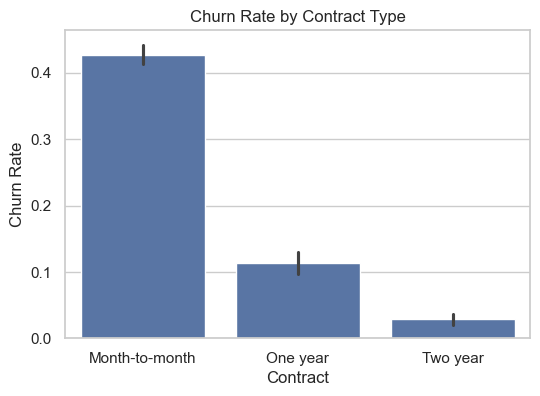

In [9]:
# Churn rate by Contract
plt.figure(figsize=(6,4))
sns.barplot(x='Contract', y='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()


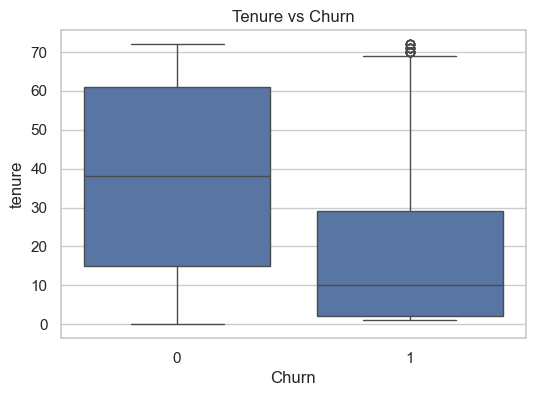

In [10]:
# Churn vs tenure
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


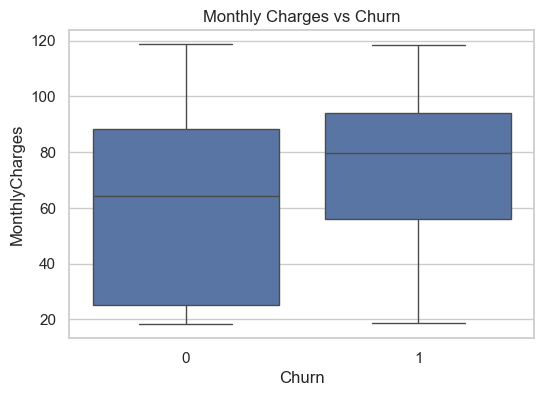

In [11]:
# Churn vs Monthly Charges
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


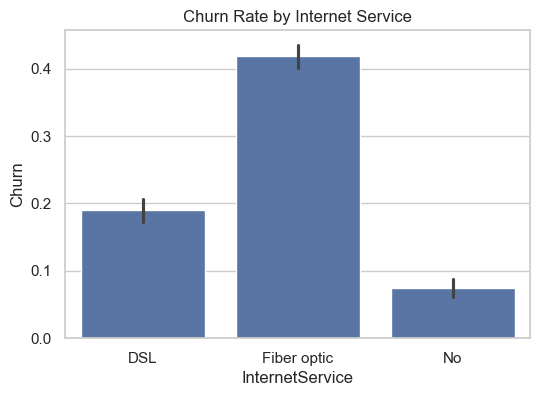

In [12]:
# Churn by Internet Service
plt.figure(figsize=(6,4))
sns.barplot(x='InternetService', y='Churn', data=df)
plt.title('Churn Rate by Internet Service')
plt.show()


## 6. Insights / Business Takeaways

- Customers with month-to-month contracts churn more
- High monthly charges may correlate with higher churn
- Certain Internet service types have higher churn rates

These insights can guide retention campaigns and targeted interventions.


## 7. Save Processed Dataset (optional)

- Keep a clean version for modeling in `data/processed/`


In [13]:
df.to_csv("../data/processed/churn_clean.csv", index=False)


## Next Steps

1. Feature engineering based on categorical/numerical insights
2. Build baseline model (logistic regression)
3. Evaluate metrics (ROC-AUC, precision, recall)
4. Compare with stronger models (Random Forest / XGBoost)
